# Lib

In [1]:
import pandas as pd
import numpy as np
import warnings
import sys

# Plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.figure_factory as ff

# Scikit-learn
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.metrics import silhouette_score

import sys
sys.path.append(r'C:\Users\antoi\Documents\Work_Learn\JEDHA\M05-Supervised_ML\JEDHA-Projet')
from function import *


# Preprocessing

In [2]:
df_taxi_zone = pd.read_csv('data/taxi-zone-lookup.csv')
df_raw = pd.read_csv('data/uber-raw-data-apr14.csv')

In [3]:
# describe_df(df_taxi_zone)
# describe_df(df_raw)

In [4]:
df = df_raw.sample(100_000)
# df = df_raw
df.head()

Date/Time      Lat      Lon    Base
256231  4/10/2014 21:47:00  40.7419 -73.9851  B02617
554445  4/30/2014 23:27:00  40.7182 -74.0069  B02682
503897   4/25/2014 7:17:00  40.7843 -73.9541  B02682
442806   4/16/2014 8:45:00  40.7361 -73.9852  B02682
329269   4/1/2014 13:44:00  40.6432 -73.7896  B02682

In [5]:
date = 'Date/Time'
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
# df['year'] = df[date].dt.year
# df['month'] = df[date].dt.month
df['dayofweek'] = df[date].dt.dayofweek
df['hour'] = df[date].dt.hour
# df['dayofyear'] = df[date].dt.dayofyear
# df['dayofmonth'] = df[date].dt.day
# df['weekofyear'] = df[date].dt.isocalendar().week
df.drop('Date/Time',axis=1,inplace=True)
df.drop('Base',axis=1,inplace=True)

In [6]:
fig = px.density_mapbox(df.sort_values('dayofweek'),lat="Lat",lon="Lon",animation_frame='dayofweek', mapbox_style="carto-positron",radius=3)
fig.update_layout(width=1000, height=550)
fig.show()

In [7]:
df_geo = df[['Lat','Lon']]

# Kmeans

Faire elbow + silhouette

In [8]:
X = df
# Computer mean silhouette score
sil = []
k = []
wcss =  []
## Careful, you need to start at i=2 as silhouette score cannot accept less than 2 labels 
for i in range (2,11): 
    kmeans = KMeans(n_clusters= i, random_state = 0, n_init='auto')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    sil.append(silhouette_score(X, kmeans.predict(X)))
    k.append(i)
  
k_choice = pd.DataFrame({'k':k, 'WCSS':wcss, 'Silhouette Score':sil}).set_index('k')
k_choice  

import plotly.graph_objects as go
figs = go.Figure()

#fig.layout.update(yaxis2 = go.YAxis(overlaying='y', side='right'))
figs.add_trace(go.Scatter(
    x = k_choice.index, 
    y = k_choice['WCSS'], 
    name = 'WCSS', 
    mode = 'lines', 
    xaxis = 'x', 
    yaxis = 'y',
))

figs.add_trace(go.Bar(
    x = k_choice.index, 
    y = k_choice['Silhouette Score'], 
    name = 'Silhouette Score', 
    xaxis = 'x', 
    yaxis = 'y2',
    opacity = 0.7
))

figs.update_layout(
    xaxis = go.layout.XAxis(title_text = 'K', tickvals = k_choice.index),
    yaxis = go.layout.YAxis(title_text = 'WCSS', color = 'blue'),
    yaxis2 = go.layout.YAxis(title_text = 'Silhouette Score', anchor = 'x', side = 'right', overlaying = 'y', color = 'red'),
    showlegend = True,
    legend_xanchor = 'left',
    legend_x = 1.2,
    legend_font_size = 14,
    autosize = False,
    title_text = 'Choice of optimal K value',
    title_x = 0.5,
    height = 500,
    width = 900
)

figs.show()

c:\Users\antoi\Documents\Work_Learn\JEDHA\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning:

Could not find the number of physical cores for the following reason:
[WinError 2] Le fichier spécifié est introuvable
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "c:\Users\antoi\Documents\Work_Learn\JEDHA\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\antoi\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\antoi\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\antoi\AppData\Local\

In [ ]:
from sklearn.cluster import MiniBatchKMeans

# kmeans = MiniBatchKMeans(n_clusters=4,random_state=0,n_init="auto")
kmeans = MiniBatchKMeans(n_clusters=6,random_state=0,init="k-means++")
kmeans.fit(df_geo)
# kmeans.cluster_centers_
df_geo['Cluster_KMeans'] = kmeans.predict(df_geo)


c:\Users\antoi\Documents\Work_Learn\JEDHA\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning:

Could not find the number of physical cores for the following reason:
[WinError 2] Le fichier spécifié est introuvable
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "c:\Users\antoi\Documents\Work_Learn\JEDHA\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\antoi\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\antoi\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\antoi\AppData\Local\

In [ ]:
fig = px.scatter_mapbox(df_geo,lat="Lat",lon="Lon",color='Cluster_KMeans', mapbox_style="carto-positron")
fig.update_layout(width=1000)
fig.show()

# DBScan

## Pipeline

In [ ]:
categorical_features = ['hour']
numeric_features = ['Lon','Lat']
# categorical_features = ['hour','Lon','Lat']
# numeric_features = []

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop="first")

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

X = preprocessor.fit_transform(df)

## First tests

In [ ]:
# eps,min_samples = 0.5,170
eps,min_samples = 0.2,100

db = DBSCAN(eps=eps, min_samples=min_samples, metric="manhattan")
db.fit(X)
df_geo['cluster'] = db.labels_
df['cluster'] = db.labels_
print(set(db.labels_))

fig = px.scatter_mapbox(df.sort_values('cluster'),lat="Lat",lon="Lon",color='hour' ,animation_frame='cluster', mapbox_style="carto-positron",zoom=9,range_color=[min(df['hour']), max(df['hour'])])
fig.update_layout(width=1000,height=700)
fig.show()

TRES TRES INTERESSANT D'ENLEVER LES OUTLIERS

In [ ]:
fig = px.scatter_mapbox(df[df['cluster'] != -1],lat="Lat",lon="Lon",color='dayofweek' , mapbox_style="carto-positron",zoom=10)
fig.update_layout(width=1000,height=700)
fig.show()

In [ ]:
fig = px.scatter_mapbox(df[df['cluster'] != -1].sort_values('dayofweek'),lat="Lat",lon="Lon",color='hour' ,animation_frame='dayofweek', mapbox_style="carto-positron",zoom=10)
fig.update_layout(width=1000,height=700)
fig.show()

In [ ]:
fig = px.scatter_mapbox(df[df['cluster'] != -1].sort_values('cluster'),lat="Lat",lon="Lon",
                        animation_frame='cluster' ,
                        color='dayofweek', 
                        mapbox_style="carto-positron",
                        zoom=10)

fig.update_layout(width=1000,height=700)
fig.show()



In [ ]:
fig = px.scatter_mapbox(df.sort_values('cluster'),lat="Lat",lon="Lon",color='hour', mapbox_style="carto-positron",zoom=9)
fig.update_layout(width=1000,height=700)
fig.show()

## Advenced Explore

https://www.sefidian.com/2022/12/18/how-to-determine-epsilon-and-minpts-parameters-of-dbscan-clustering/

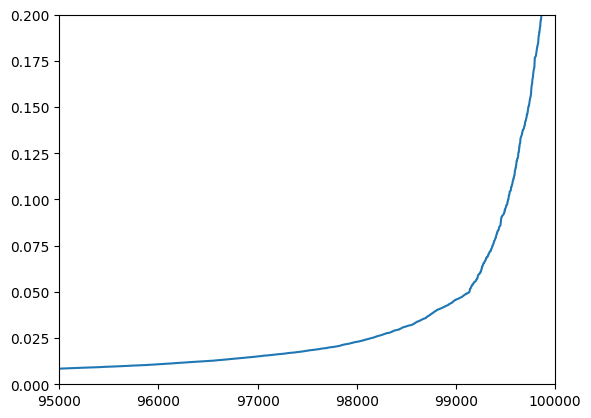

In [ ]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
 
neighbors = NearestNeighbors(n_neighbors=8)
neighbors_fit = neighbors.fit(df)
distances, indices = neighbors_fit.kneighbors(df)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.ylim(0, 0.2)
plt.xlim(95_000, 100_000)
plt.plot(distances)

In [ ]:
# Eps = 0.2
# Min_samples = 150
Eps = 0.05
Min_samples = 10


# db = DBSCAN(eps=0.3, min_samples=150, metric="manhattan")
db = DBSCAN(eps=Eps, min_samples=Min_samples, metric="euclidean")
db.fit(X)
df['cluster'] = db.labels_
print(set(db.labels_))



{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [ ]:
df_without_outlier = df[df['cluster']!=-1]

day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_without_outlier['dayofweek_name'] = df_without_outlier['dayofweek'].map(lambda x: day_names[x])

In [ ]:
import pandas as pd
# df_without_outlier = pd.read_csv('df_without_outlier.csv')
Eps = 0.2
Min_samples = 100

In [ ]:
# c = 'dayofweek_name'
c = 'hour'
anim = 'cluster'
viz = df_without_outlier[df_without_outlier['dayofweek']==0].sort_values(anim)

fig = px.scatter_mapbox(viz, lat="Lat", lon="Lon",
                        animation_frame=anim, color=c,animation_group='dayofweek',
                        range_color=[0,23],
                        mapbox_style="carto-positron", zoom=11)
fig.update_layout(width=1000, height=700, title=f'eps: {Eps}  |  min_sample: {Min_samples}')
fig.show()



In [ ]:

c = 'dayofweek_name'
anim = 'cluster'
viz = df_without_outlier.sort_values(anim)

fig = px.scatter_mapbox(viz, lat="Lat", lon="Lon",
                        animation_frame=anim, color=c,
                        # range_color=[0,23],
                        mapbox_style="carto-positron", zoom=11)
fig.update_layout(width=1000, 
                  height=700, 
                  title=f'eps: {Eps}  |  min_sample: {Min_samples}',
                  )


fig.show()



In [ ]:
import plotly.express as px

day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_without_outlier['dayofweek_name'] = df_without_outlier['dayofweek'].map(lambda x: day_names[x])

c = 'dayofweek_name'
anim = 'cluster'
# viz = df_without_outlier.sort_values(anim)

fig = px.scatter_mapbox(df_without_outlier, lat="Lat", lon="Lon",
                        color='hour',
                        animation_frame='dayofweek',
                        mapbox_style="carto-positron", zoom=10)


day_masks = [(df_without_outlier['dayofweek'] == i) for i in range(7)]  # 0 à 6 pour lundi à dimanche


fig.update_layout(
    width=1000,
    height=700,
    title=f'eps: {Eps}  |  min_sample: {Min_samples}',
    sliders=[
        dict(
            active=0,  # les données pour le lundi
            steps=[dict(label=str(i), method="update", args=[{"visible": mask}]) for i, mask in enumerate(day_masks)],
            pad={"t": 50},  # Ajouter un peu de marge en haut
        )
    ]
)

fig.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go

day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_without_outlier['dayofweek_name'] = df_without_outlier['dayofweek'].map(lambda x: day_names[x])

fig = go.Figure()

# Iterate over each day of the week
for chosen_day in range(7):
    mask = df_without_outlier['dayofweek'] == chosen_day
    scatter = go.Scattermapbox(
        lat=df_without_outlier[mask]['Lat'],
        lon=df_without_outlier[mask]['Lon'],
        mode='markers',
        marker=dict(
            size=10,
            color=df_without_outlier[mask]['hour'],
            colorscale='Viridis',
            cmin=df_without_outlier['hour'].min(),
            cmax=df_without_outlier['hour'].max(),
            colorbar=dict(title='Hour')
        ),
        name=day_names[chosen_day]
    )
    fig.add_trace(scatter)

# Set up slider
steps = []
for i in range(7):
    step = dict(
        method="update",
        args=[{"visible": [False] * 7}],
        label=day_names[i]
    )
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=0,
    currentvalue={"prefix": "Day: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    mapbox=dict(
        style="carto-positron",
        zoom=10,
        center=dict(lat=df_without_outlier['Lat'].mean(), lon=df_without_outlier['Lon'].mean())
    ),
    sliders=sliders,
    width=1000,
    height=700,
    title='Example Scatter Map'
)

fig.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go

day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# df_without_outlier['dayofweek_name'] = df_without_outlier['dayofweek'].map(lambda x: day_names[x])

fig = go.Figure()

# Iterate over each day of the week
for chosen_hour in range(24):
    mask = df_without_outlier['hour'] == chosen_hour
    scatter = go.Scattermapbox(
        lat=df_without_outlier[mask]['Lat'],
        lon=df_without_outlier[mask]['Lon'],
        mode='markers',
        marker=dict(
            size=10,
            color=df_without_outlier[mask]['dayofweek'],
            colorscale='Viridis',
            cmin=df_without_outlier['dayofweek'].min(),
            cmax=df_without_outlier['dayofweek'].max(),
            colorbar=dict(title='dayofweek')
        ),
        name=chosen_hour
    )
    fig.add_trace(scatter)

# Set up slider
steps = []
for i in range(24):
    step = dict(
        method="update",
        args=[{"visible": [False] * 24}],
        label=i
    )
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=0,
    currentvalue={"prefix": "Hour: "},
    pad={"t": 50},
    steps=steps
)]
fig.update_traces(showlegend=False)

fig.update_layout(
    mapbox=dict(
        style="carto-positron",
        zoom=10,
        center=dict(lat=df_without_outlier['Lat'].mean(), lon=df_without_outlier['Lon'].mean())
    ),
    sliders=sliders,
    width=1000,
    height=700,
    title='Example Scatter Map'
)

fig.show()


Faire des groupes d'heures

In [ ]:
import pandas as pd
import plotly.graph_objects as go

day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig = go.Figure()

for chosen_day in range(7):
    for chosen_hour in range(24):
        mask = (df_without_outlier['dayofweek'] == chosen_day) & (df_without_outlier['hour'] == chosen_hour)
        scatter = go.Scattermapbox(
            lat=df_without_outlier[mask]['Lat'],
            lon=df_without_outlier[mask]['Lon'],
            mode='markers',
            marker=dict(
                size=10,
                color=df_without_outlier[mask]['cluster'],
                colorscale='Viridis',
                cmin=df_without_outlier['cluster'].min(),
                cmax=df_without_outlier['cluster'].max(),
                colorbar=dict(title='Cluster')
            ),
            name=f"{day_names[chosen_day]} - {chosen_hour}:00"
        )
        fig.add_trace(scatter)

day_steps = []
for i in range(7):
    step = dict(
        method="update",
        args=[{"visible": [False] * 168}],  # 7j * 24h = 168 fig
        label=day_names[i]
    )
    for j in range(i * 24, (i + 1) * 24):  
        step["args"][0]["visible"][j] = True
    day_steps.append(step)

day_slider = dict(
    active=0,
    currentvalue={"prefix": "Day: "},
    pad={"t": 30},
    steps=day_steps,
    x=0,
    xanchor="left",
    y=-0.35,
    yanchor="bottom"
)

hour_steps = []
for i in range(24):
    step = dict(
        method="update",
        args=[{"visible": [False] * 168}],  # 7j * 24h = 168 fig
        label=f"{i}:00"
    )
    for j in range(i, 168, 24):
        step["args"][0]["visible"][j] = True
    hour_steps.append(step)

hour_slider = dict(
    active=0,
    currentvalue={"prefix": "Hour: "},
    pad={"t": 30},
    steps=hour_steps,
    x=0,
    xanchor="left",
    y=-0.15,
    yanchor="bottom"
)

sliders = [day_slider, hour_slider]

fig.update_layout(
    mapbox=dict(
        style="carto-positron",
        zoom=10,
        center=dict(lat=df_without_outlier['Lat'].mean(), lon=df_without_outlier['Lon'].mean())
    ),
    sliders=sliders,
    width=1000,
    height=800,
    title='Example Scatter Map'
)
fig.update_traces(showlegend=False)


fig.show()


# save model to csv

In [ ]:
# df_without_outlier.to_csv('df_without_outlier.csv')
